In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
path = "F:\Python_Projects\Best Buy Assessment\Data Analyst Assignment\data.csv"

# Data Loading

In [2]:
data = pd.read_csv(path)
data.head()

,Date,Sales,Budget,Product Page Visits,Sold Out Product Page Visits
0,Jan-15,"$14,840","$13,740",NaN,NaN
1,Feb-15,"$14,820","$16,466",NaN,NaN
2,Mar-15,"$17,920","$18,474",NaN,NaN
3,Apr-15,"$19,020","$17,449",NaN,NaN
4,May-15,"$20,600","$22,150",NaN,NaN


In [3]:
print(data.describe())
data.info()

         Date       Sales     Budget Product Page Visits  \
count       72         60         72                  52   
unique      72         60         72                  47   
top     Jan-15   $14,840    $13,740              83,258    
freq         1          1          1                   3   

       Sold Out Product Page Visits  
count                            52  
unique                           51  
top                            815   
freq                              2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          72 non-null     object
 1   Sales                         60 non-null     object
 2   Budget                        72 non-null     object
 3   Product Page Visits           52 non-null     object
 4   Sold Out Product Page Visits  52 non-null     object
d

# Data Transformation

#### Generate Date field

In [4]:
data['mo'] = data['Date '].apply(lambda row: row[:3])
#data.head()

In [5]:
def month_to_num(row):
    if row=='Jan':
        return 1
    elif row=='Feb':
        return 2
    elif row=='Mar':
        return 3
    elif row=='Apr':
        return 4
    elif row=='May':
        return 5
    elif row=='Jun':
        return 6
    elif row=='Jul':
        return 7
    elif row=='Aug':
        return 8
    elif row=='Sep':
        return 9
    elif row=='Oct':
        return 10
    elif row=='Nov':
        return 11
    elif row=='Dec':
        return 12
    else:
        return 0

In [6]:
data['Month'] = data['mo'].apply(lambda row: month_to_num(row))
print(data.head())

    Date       Sales     Budget Product Page Visits  \
0  Jan-15   $14,840    $13,740                  NaN   
1  Feb-15   $14,820    $16,466                  NaN   
2  Mar-15   $17,920    $18,474                  NaN   
3  Apr-15   $19,020    $17,449                  NaN   
4  May-15   $20,600    $22,150                  NaN   

  Sold Out Product Page Visits   mo  Month  
0                          NaN  Jan      1  
1                          NaN  Feb      2  
2                          NaN  Mar      3  
3                          NaN  Apr      4  
4                          NaN  May      5  


In [7]:
data['Year'] = data['Date '].apply(lambda row: "20"+row[4:])
data

,Date,Sales,Budget,Product Page Visits,Sold Out Product Page Visits,mo,Month,Year
0,Jan-15,"$14,840","$13,740",NaN,NaN,Jan,1,2015
1,Feb-15,"$14,820","$16,466",NaN,NaN,Feb,2,2015
2,Mar-15,"$17,920","$18,474",NaN,NaN,Mar,3,2015
3,Apr-15,"$19,020","$17,449",NaN,NaN,Apr,4,2015
4,May-15,"$20,600","$22,150",NaN,NaN,May,5,2015
...,...,...,...,...,...,...,...,...
67,Aug-20,NaN,"$17,226",NaN,NaN,Aug,8,2020
68,Sep-20,NaN,"$19,822",NaN,NaN,Sep,9,2020
69,Oct-20,NaN,"$22,506",NaN,NaN,Oct,10,2020
70,Nov-20,NaN,"$53,196",NaN,NaN,Nov,11,2020


In [8]:
data['Date'] = pd.to_datetime(data[['Month', 'Year']].assign(DAY=1))
data.drop('Date ', axis=1, inplace=True)
data.drop('mo', axis=1, inplace=True)
print(data.head())
data.info()

       Sales     Budget Product Page Visits Sold Out Product Page Visits  \
0   $14,840    $13,740                  NaN                          NaN   
1   $14,820    $16,466                  NaN                          NaN   
2   $17,920    $18,474                  NaN                          NaN   
3   $19,020    $17,449                  NaN                          NaN   
4   $20,600    $22,150                  NaN                          NaN   

   Month  Year       Date  
0      1  2015 2015-01-01  
1      2  2015 2015-02-01  
2      3  2015 2015-03-01  
3      4  2015 2015-04-01  
4      5  2015 2015-05-01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Sales                         60 non-null     object        
 1   Budget                        72 non-null     object        
 2   Prod

In [9]:
def convert_num(row):
    if type(row)==str:
        return float(row[2:4]+row[5:])
    else:
        return row

In [10]:
data['Sales'] = data['Sales'].apply(lambda row: convert_num(row))
data['Budget'] = data['Budget'].apply(lambda row: float(row[2:4]+row[5:]))
data.head()

,Sales,Budget,Product Page Visits,Sold Out Product Page Visits,Month,Year,Date
0,14840.0,13740.0,NaN,NaN,1,2015,2015-01-01
1,14820.0,16466.0,NaN,NaN,2,2015,2015-02-01
2,17920.0,18474.0,NaN,NaN,3,2015,2015-03-01
3,19020.0,17449.0,NaN,NaN,4,2015,2015-04-01
4,20600.0,22150.0,NaN,NaN,5,2015,2015-05-01


In [11]:
print(data.info(), data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Sales                         60 non-null     float64       
 1   Budget                        72 non-null     float64       
 2   Product Page Visits           52 non-null     object        
 3   Sold Out Product Page Visits  52 non-null     object        
 4   Month                         72 non-null     int64         
 5   Year                          72 non-null     object        
 6   Date                          72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 4.1+ KB
None               Sales        Budget      Month
count     60.000000     72.000000  72.000000
mean   27071.550000  27638.319444   6.500000
std    11223.424811  11280.028726   3.476278
min    13940.000000  12907.000000   1.

#### Handling Missing Values

In [12]:
data.isnull().sum()

Sales                           12
Budget                           0
Product Page Visits             20
Sold Out Product Page Visits    20
Month                            0
Year                             0
Date                             0
dtype: int64

In [13]:
data.fillna(0,inplace=True)
data.isnull().sum()

Sales                           0
Budget                          0
Product Page Visits             0
Sold Out Product Page Visits    0
Month                           0
Year                            0
Date                            0
dtype: int64

In [14]:
print(data.info(), data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Sales                         72 non-null     float64       
 1   Budget                        72 non-null     float64       
 2   Product Page Visits           72 non-null     object        
 3   Sold Out Product Page Visits  72 non-null     object        
 4   Month                         72 non-null     int64         
 5   Year                          72 non-null     object        
 6   Date                          72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 4.1+ KB
None               Sales        Budget      Month
count     72.000000     72.000000  72.000000
mean   22559.625000  27638.319444   6.500000
std    14418.610235  11280.028726   3.476278
min        0.000000  12907.000000   1.

In [15]:
data['Product Page Visits'].unique()

array([0, ' 113,533 ', ' 101,234 ', ' 103,315 ', ' 114,953 ', ' 100,288 ',
       ' 90,354 ', ' 88,461 ', ' 82,785 ', ' 84,015 ', ' 87,042 ',
       ' 90,070 ', ' 110,222 ', ' 126,779 ', ' 133,969 ', ' 128,671 ',
       ' 118,264 ', ' 110,127 ', ' 92,246 ', ' 90,827 ', ' 83,258 ',
       ' 77,581 ', ' 112,587 ', ' 119,683 ', ' 96,125 ', ' 109,749 ',
       ' 107,478 ', ' 103,599 ', ' 89,408 ', ' 91,773 ', ' 75,689 ',
       ' 84,204 ', ' 94,990 ', ' 108,330 ', ' 114,290 ', ' 99,342 ',
       ' 111,641 ', ' 103,126 ', ' 94,611 ', ' 84,677 ', ' 78,716 ',
       ' 73,797 ', ' 71,431 ', ' 75,310 ', ' 102,653 ', ' 89,881 ',
       ' 120,927 ', ' 116,407 '], dtype=object)

In [16]:
data['Sold Out Product Page Visits'].unique()

array([0, ' 1,130 ', ' 780 ', ' 693 ', ' 1,176 ', ' 1,102 ', ' 1,020 ',
       ' 855 ', ' 980 ', ' 790 ', ' 723 ', ' 1,218 ', ' 1,226 ', ' 502 ',
       ' 1,641 ', ' 1,095 ', ' 922 ', ' 1,116 ', ' 1,121 ', ' 987 ',
       ' 806 ', ' 862 ', ' 1,772 ', ' 1,723 ', ' 1,557 ', ' 379 ',
       ' 815 ', ' 1,168 ', ' 758 ', ' 876 ', ' 1,006 ', ' 1,141 ',
       ' 604 ', ' 725 ', ' 717 ', ' 878 ', ' 945 ', ' 637 ', ' 1,983 ',
       ' 1,490 ', ' 1,279 ', ' 1,002 ', ' 959 ', ' 863 ', ' 940 ',
       ' 795 ', ' 819 ', ' 656 ', ' 26 ', ' 671 ', ' 1,144 ', ' 1,068 '],
      dtype=object)

#### Data Type Conversation

In [17]:
def to_num(row):
    if type(row)==str:
        if ',' in row:
            index = row.strip().index(',')
            #print(row.strip()[:index] + row.strip()[index+1:])
            return float(row.strip()[:index] + row.strip()[index+1:])
    else:
        #print(row)
        return float(row)

In [18]:
data['Product Page Visits'] = data['Product Page Visits'].apply(lambda row: to_num(row))
data['Sold Out Product Page Visits'] = data['Sold Out Product Page Visits'].apply(lambda row: to_num(row))
print(data.info(), data.describe(), data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Sales                         72 non-null     float64       
 1   Budget                        72 non-null     float64       
 2   Product Page Visits           72 non-null     float64       
 3   Sold Out Product Page Visits  42 non-null     float64       
 4   Month                         72 non-null     int64         
 5   Year                          72 non-null     object        
 6   Date                          72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 4.1+ KB
None               Sales        Budget  Product Page Visits  \
count     72.000000     72.000000            72.000000   
mean   22559.625000  27638.319444         71016.861111   
std    14418.610235  11280.028726         46

In [19]:
train = data[['Sales', 'Budget', 'Product Page Visits', 'Sold Out Product Page Visits', 'Date']].iloc[:60, :]
print(train.head(), end="\n")
test = data[['Sales', 'Budget', 'Product Page Visits', 'Sold Out Product Page Visits', 'Date']].iloc[60:, :]
test.head()

     Sales   Budget  Product Page Visits  Sold Out Product Page Visits  \
0  14840.0  13740.0                  0.0                           0.0   
1  14820.0  16466.0                  0.0                           0.0   
2  17920.0  18474.0                  0.0                           0.0   
3  19020.0  17449.0                  0.0                           0.0   
4  20600.0  22150.0                  0.0                           0.0   

        Date  
0 2015-01-01  
1 2015-02-01  
2 2015-03-01  
3 2015-04-01  
4 2015-05-01  


,Sales,Budget,Product Page Visits,Sold Out Product Page Visits,Date
60,0.0,35200.0,0.0,0.0,2020-01-01
61,0.0,31240.0,0.0,0.0,2020-02-01
62,0.0,21362.0,0.0,0.0,2020-03-01
63,0.0,23452.0,0.0,0.0,2020-04-01
64,0.0,25740.0,0.0,0.0,2020-05-01


In [20]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

#### EDA

In [21]:
train.corr()

,Sales,Budget,Product Page Visits,Sold Out Product Page Visits
Sales,1.000000,0.964731,0.507698,0.218855
Budget,0.964731,1.000000,0.472669,0.380015
Product Page Visits,0.507698,0.472669,1.000000,0.401426
Sold Out Product Page Visits,0.218855,0.380015,0.401426,1.000000


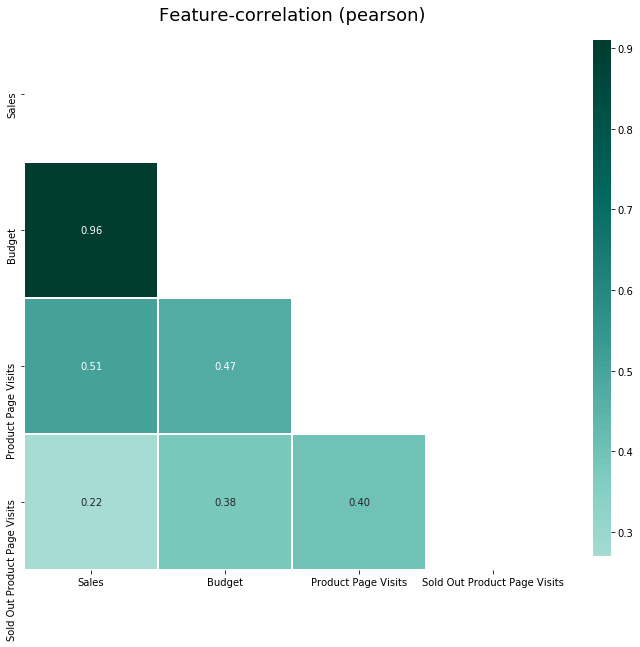

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import klib
%matplotlib inline

klib.corr_plot(train)

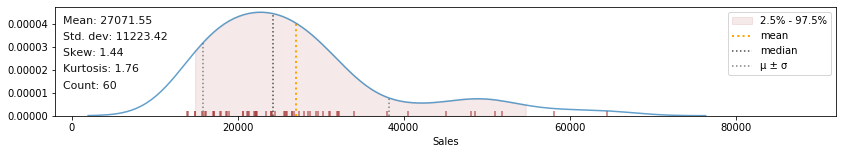

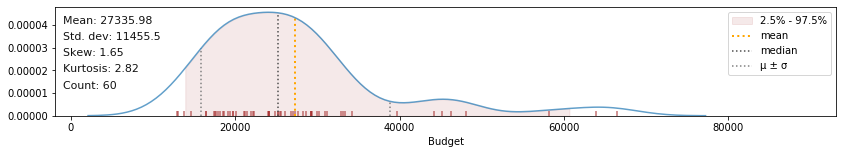

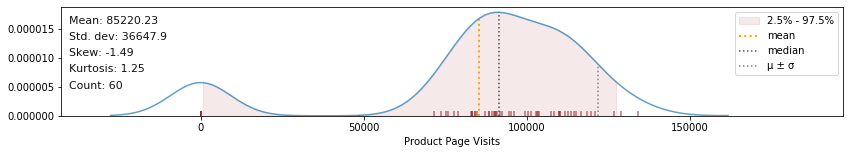

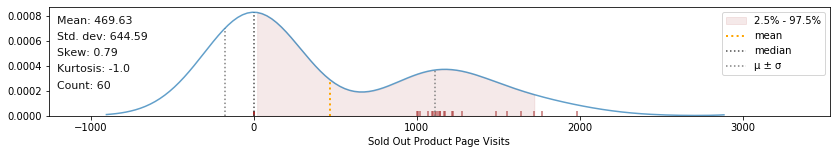

In [23]:
klib.dist_plot(train)

In [24]:
klib.missingval_plot(train)

No missing values found in the dataset.


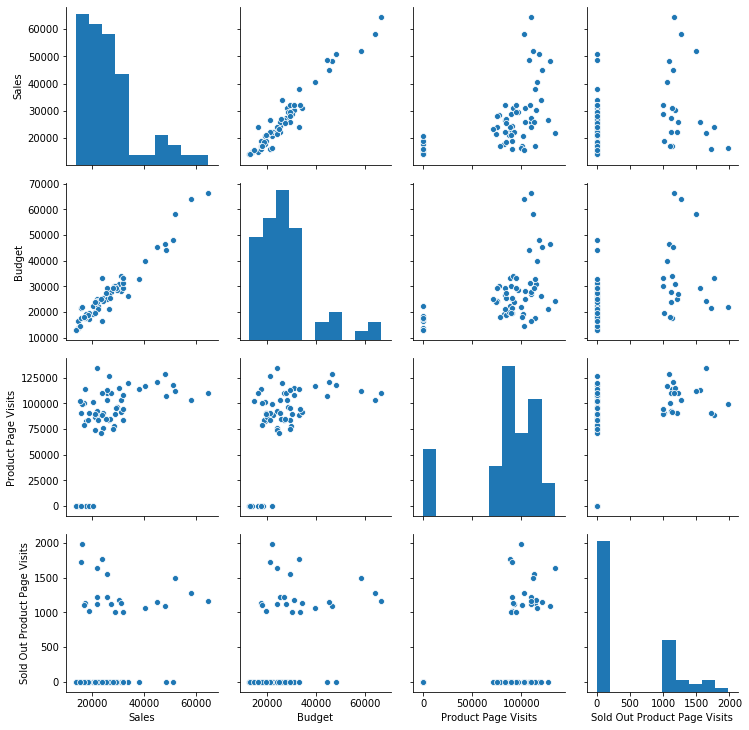

In [25]:
sns.pairplot(train)

#### Prediction

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train[['Budget']], train[['Sales']], test_size=0.1, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(y_pred,"\n", y_test)
lr.score(y_test, y_pred)

[[25258.93755099]
 [42650.08078787]
 [38480.25280541]
 [29395.35493755]
 [30345.70077642]
 [18757.79243255]] 
       Sales
26  24460.0
35  48640.0
59  40520.0
28  28440.0
11  30260.0
2   17920.0


0.94462053935546

In [28]:
y_pred = lr.predict(test[['Budget']])
y_pred

array([[34280.72651549],
       [30605.56096674],
       [21438.06468124],
       [23377.73538753],
       [25501.16437125],
       [30258.46199824],
       [24459.86746577],
       [17599.55844143],
       [20008.8336345 ],
       [22499.7791731 ],
       [50982.31217593],
       [42978.6183142 ]])

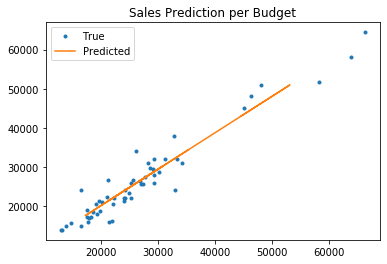

In [29]:
plt.plot(x_train, y_train, '.', label="True")
plt.plot(test['Budget'], y_pred, '-', label="Predicted")
plt.title("Sales Prediction per Budget")
plt.legend()
plt.show()

In [30]:
x = train.drop(['Sales', 'Date'], axis=1)
y = train['Sales']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=0)
#print(X_train,"\n", X_test,"\n", Y_train, "\n", Y_test)

In [32]:
lr_2 = LinearRegression()
lr_2.fit(X_train, Y_train)
Y_pred = lr_2.predict(X_test)
print(Y_pred, "\n", Y_test)
#lr.score(Y_test, Y_pred)


[27188.7659286  45723.0395317  37885.87297476 30928.13408921
 29068.95769553 16971.17377673] 
 26    24460.0
35    48640.0
59    40520.0
28    28440.0
11    30260.0
2     17920.0
Name: Sales, dtype: float64


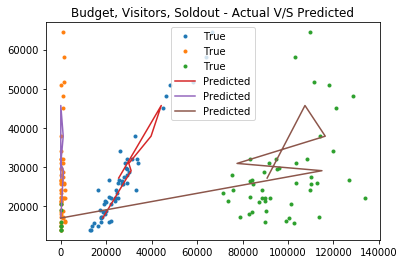

In [33]:
plt.plot(X_train[['Budget', 'Sold Out Product Page Visits', 'Product Page Visits']], Y_train, '.', label="True")
plt.plot(X_test[['Budget', 'Sold Out Product Page Visits', 'Product Page Visits']], Y_pred, '-', label="Predicted")
plt.title("Budget, Visitors, Soldout - Actual V/S Predicted")
plt.legend()
plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

0     35200.0
1     31240.0
2     21362.0
3     23452.0
4     25740.0
5     30866.0
6     24618.0
7     17226.0
8     19822.0
9     22506.0
10    53196.0
11    44572.0
Name: Budget, dtype: float64 
                0
0   34280.726515
1   30605.560967
2   21438.064681
3   23377.735388
4   25501.164371
5   30258.461998
6   24459.867466
7   17599.558441
8   20008.833635
9   22499.779173
10  50982.312176
11  42978.618314


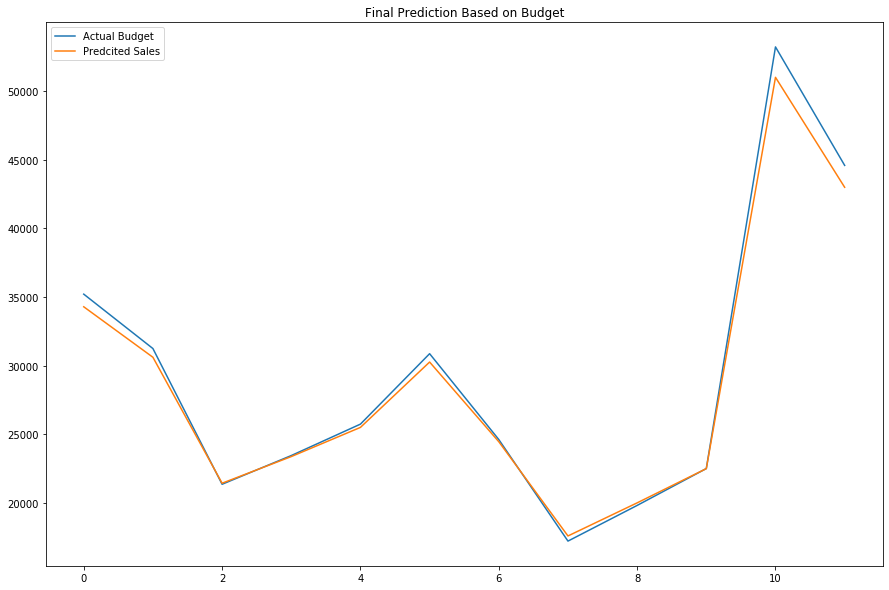

In [34]:
model = lr.predict(test[['Budget']])
predicted = pd.DataFrame(index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                        data = model)
print(test['Budget'].reset_index(drop=True), "\n",  predicted)
plt.plot(test['Budget'].reset_index(drop=True), label="Actual Budget")
plt.plot(predicted, label="Predcited Sales")
plt.title("Final Prediction Based on Budget")
plt.legend()
plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

# Time-Seriese Analysis

In [35]:
data.head()

,Sales,Budget,Product Page Visits,Sold Out Product Page Visits,Month,Year,Date
0,14840.0,13740.0,0.0,0.0,1,2015,2015-01-01
1,14820.0,16466.0,0.0,0.0,2,2015,2015-02-01
2,17920.0,18474.0,0.0,0.0,3,2015,2015-03-01
3,19020.0,17449.0,0.0,0.0,4,2015,2015-04-01
4,20600.0,22150.0,0.0,0.0,5,2015,2015-05-01


In [36]:
time_df = data[['Date', 'Sales']]
time_df.set_index('Date', inplace=True)
print(time_df.head())
time_df.tail(12)

              Sales
Date               
2015-01-01  14840.0
2015-02-01  14820.0
2015-03-01  17920.0
2015-04-01  19020.0
2015-05-01  20600.0


,Sales
Date,
2020-01-01,0.0
2020-02-01,0.0
2020-03-01,0.0
2020-04-01,0.0
2020-05-01,0.0
2020-06-01,0.0
2020-07-01,0.0
2020-08-01,0.0
2020-09-01,0.0


In [37]:
time_df_train = time_df.iloc[:60, :]
time_df_test = time_df.iloc[61:,:]
print(time_df_train.describe())
time_df_train.info()

              Sales
count     60.000000
mean   27071.550000
std    11223.424811
min    13940.000000
25%    18955.000000
50%    24310.000000
75%    30455.000000
max    64440.000000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


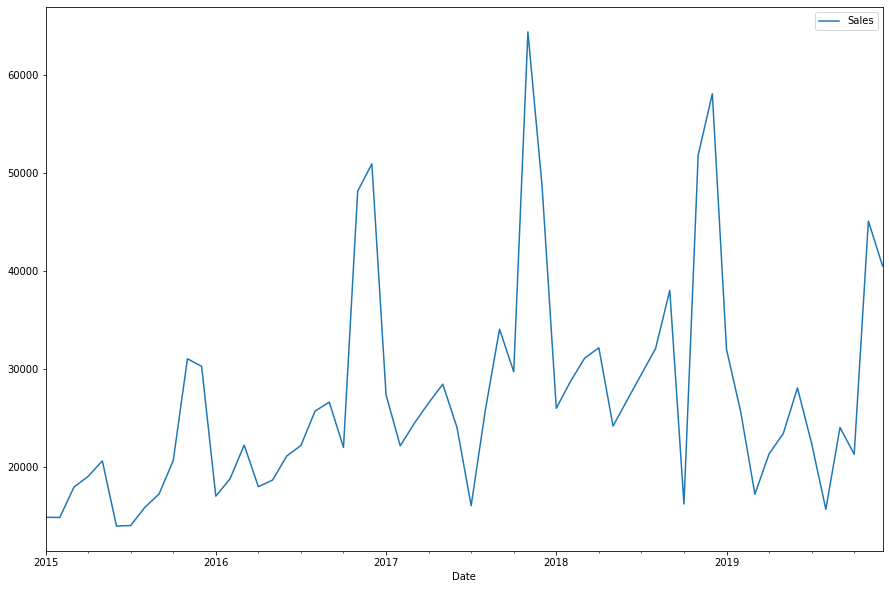

In [38]:
time_df_train.plot()

Data looks seasonal 

In [39]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(time_df_train['Sales'])
test_result

(-1.7256705961365155,
 0.41793709706125826,
 11,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 1011.5638977848267)

In [40]:
#H0 = Data is not Stationary
#H1 = Data is Stationary

def adfuller_test(sales):
    result=adfuller(sales, regression='ct', autolag='BIC')#, maxlag=0)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [41]:
adfuller_test(time_df_train['Sales'])

ADF Test Statistic : 1.3113254203406206
p-value : 1.0
#Lags Used : 11
Number of Observations Used : 48
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


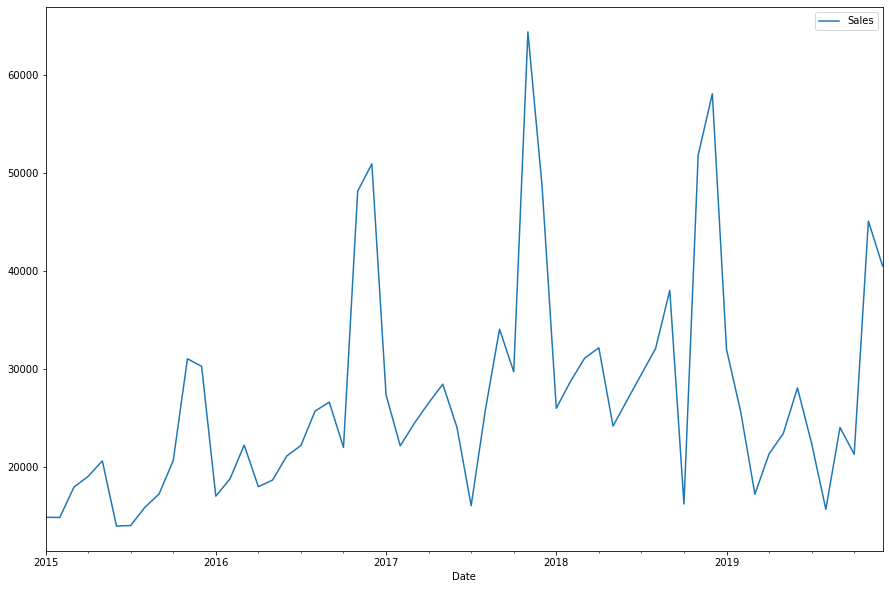

In [42]:
time_df_train.plot()

In [43]:
time_df_train['FD'] = time_df_train['Sales'] - time_df_train['Sales'].shift(12)
adfuller_test(time_df_train['FD'].dropna())

ADF Test Statistic : -6.326399194327908
p-value : 4.4143544569227326e-07
#Lags Used : 1
Number of Observations Used : 46
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


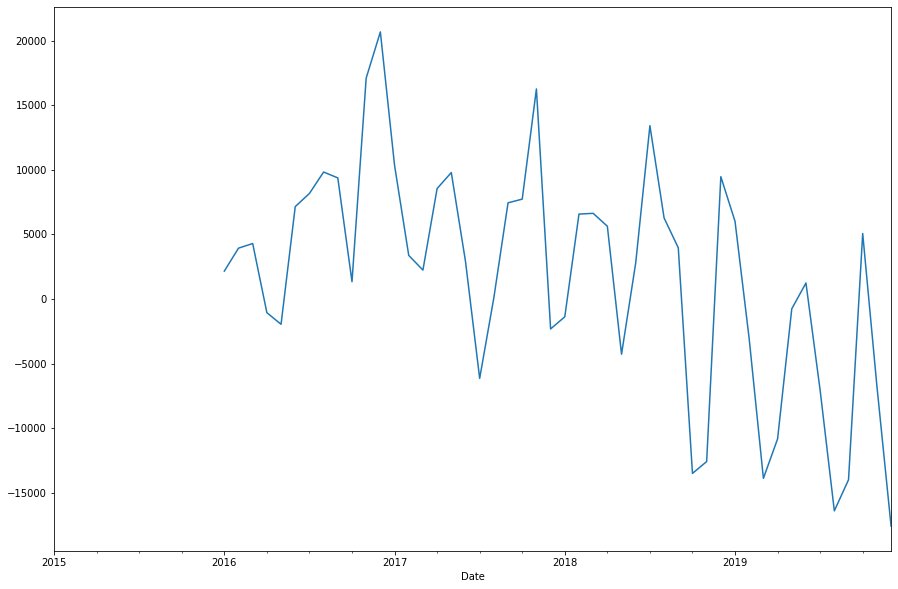

In [44]:
time_df_train['FD'].plot()

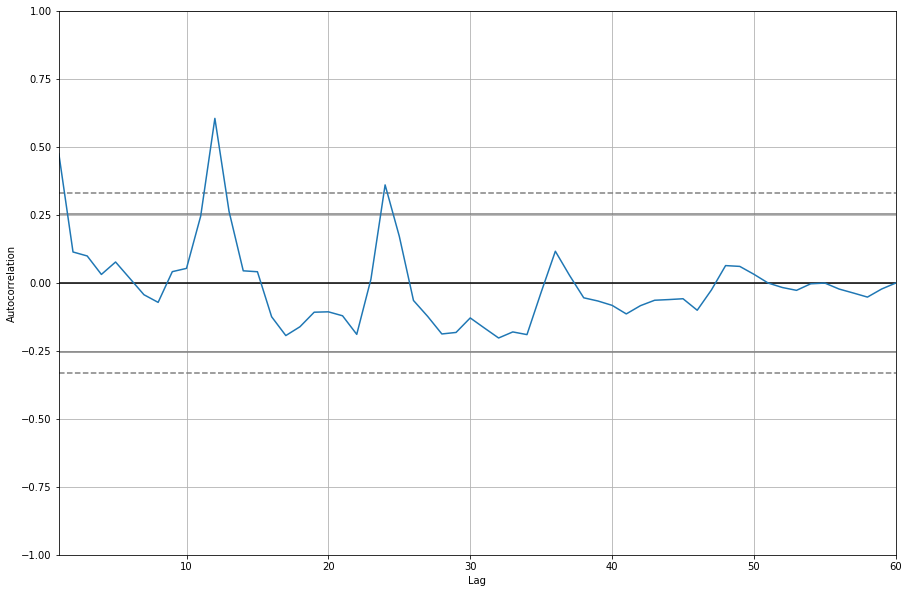

In [45]:
#pandas.tools.plotting import autocorrelation_plot
pd.plotting.autocorrelation_plot(time_df_train['Sales'])
plt.show()

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

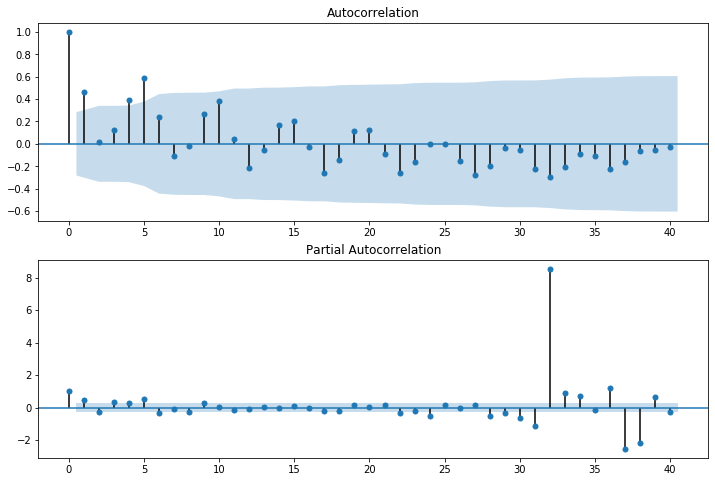

In [47]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(time_df_train['FD'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(time_df_train['FD'].dropna(),lags=40,ax=ax2)

p(PACF)=1; d(seasonal diff)=1; q(ACF)=1

F:\Software\Anaconda\New Anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
F:\Software\Anaconda\New Anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Date
2020-01-01    27257.769760
2020-02-01    23623.839537
2020-03-01    18456.463387
2020-04-01    21654.385757
2020-05-01    20699.255822
2020-06-01    21166.206425
2020-07-01    21668.684701
2020-08-01    25779.621961
2020-09-01    32216.953790
2020-10-01    14072.010378
2020-11-01    49514.497662
2020-12-01    51147.966925
Name: Forcast, dtype: float64


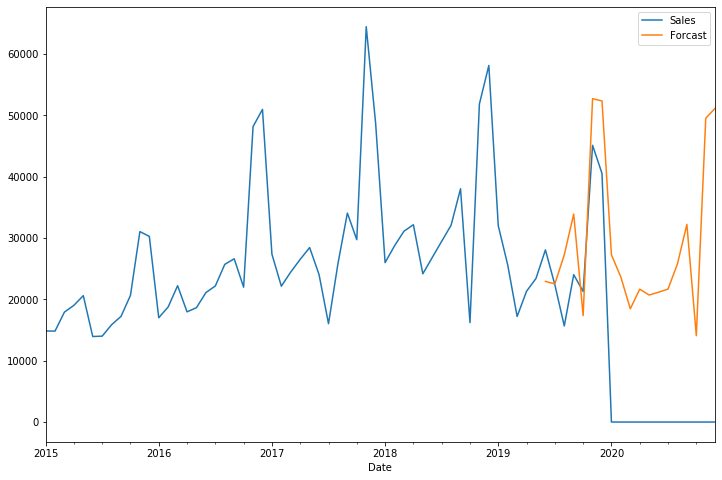

In [48]:
model = sm.tsa.statespace.SARIMAX(time_df['Sales'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
result = model.fit()
time_df['Forcast'] = result.predict(start=53, end=71, dynamic=True)
print(time_df['Forcast'].tail(12))
#time_df[['Sales', 'Forcast']].plot(figsize=(12,8))

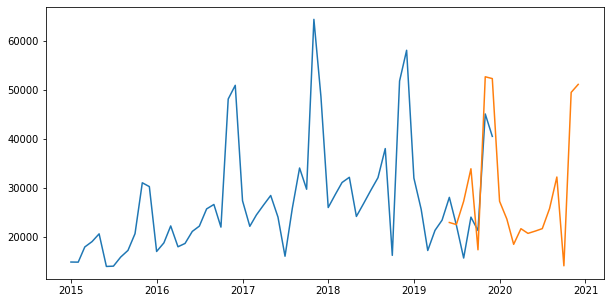

In [65]:
plt.plot(time_df['Sales'].iloc[:60])
plt.plot(time_df['Forcast'])
plt.rcParams["figure.figsize"] = (7, 5)
plt.show()

# Multivariate Analysis

In [50]:
data.fillna(0, inplace=True)
df = data.copy()
df['Quarter'] = pd.DatetimeIndex(df['Date']).quarter
df.drop('Date', axis=1, inplace=True)
df.head()

,Sales,Budget,Product Page Visits,Sold Out Product Page Visits,Month,Year,Quarter
0,14840.0,13740.0,0.0,0.0,1,2015,1
1,14820.0,16466.0,0.0,0.0,2,2015,1
2,17920.0,18474.0,0.0,0.0,3,2015,1
3,19020.0,17449.0,0.0,0.0,4,2015,2
4,20600.0,22150.0,0.0,0.0,5,2015,2


In [51]:
print(df.isnull().sum())
print(df.info())

Sales                           0
Budget                          0
Product Page Visits             0
Sold Out Product Page Visits    0
Month                           0
Year                            0
Quarter                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sales                         72 non-null     float64
 1   Budget                        72 non-null     float64
 2   Product Page Visits           72 non-null     float64
 3   Sold Out Product Page Visits  72 non-null     float64
 4   Month                         72 non-null     int64  
 5   Year                          72 non-null     object 
 6   Quarter                       72 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 4.1+ KB
None


In [52]:
df = pd.get_dummies(df, columns=['Year'], drop_first=True, prefix='Year')
df = pd.get_dummies(df, columns=['Month'], drop_first=True, prefix='Month')
df = pd.get_dummies(df, columns=['Quarter'], drop_first=True, prefix='Quarter')
df.head()

,Sales,Budget,Product Page Visits,Sold Out Product Page Visits,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Month_2,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Quarter_2,Quarter_3,Quarter_4
0,14840.0,13740.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14820.0,16466.0,0.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,17920.0,18474.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19020.0,17449.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,20600.0,22150.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
train = df[:59]
test = df[60:]
X_train = train.drop('Sales', axis=1)
y_train = train['Sales']
X_test = test.drop('Sales', axis=1)

### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dt = DecisionTreeRegressor(random_state=50)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([28440., 28440., 20600., 21320., 26820., 28440., 22180., 15860.,
       21100., 20600., 50960., 48640.])

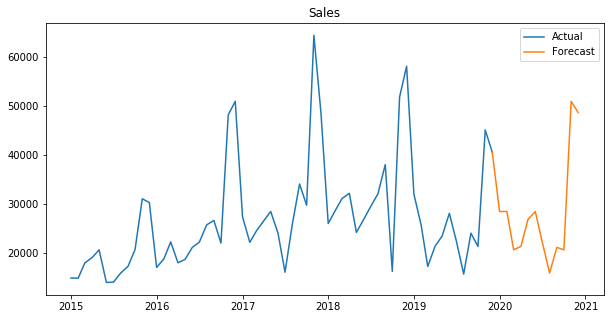

In [56]:
df.index = data.Date
df['Sales'][60:] = y_pred
plt.plot(df['Sales'][:60], label="Actual")
plt.plot(df['Sales'][59:], label="Forecast")
plt.title("Sales")
plt.legend()
plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

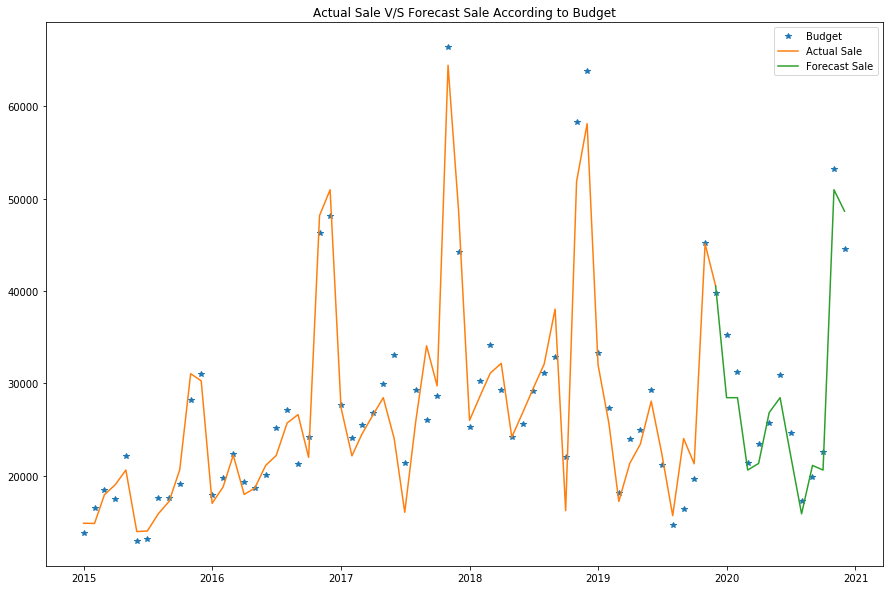

In [57]:
plt.plot(df['Budget'], '*', label="Budget")
plt.plot(df['Sales'][:60], label="Actual Sale")
plt.plot(df['Sales'][59:], label="Forecast Sale")
plt.title("Actual Sale V/S Forecast Sale According to Budget")
plt.legend()
plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

### Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rfr = RandomForestRegressor(n_estimators=5000, oob_score=True, random_state=100)
rfr.fit(X_train, y_train)
y_pred_1 = rfr.predict(X_test)
y_pred_1

array([30432.7968, 29591.6648, 20218.3044, 21148.5188, 26290.4226,
       29233.8972, 22290.2514, 16755.0842, 20653.3066, 21006.9022,
       52035.077 , 50212.0702])

In [60]:
df['Sales'][60:] = y_pred_1

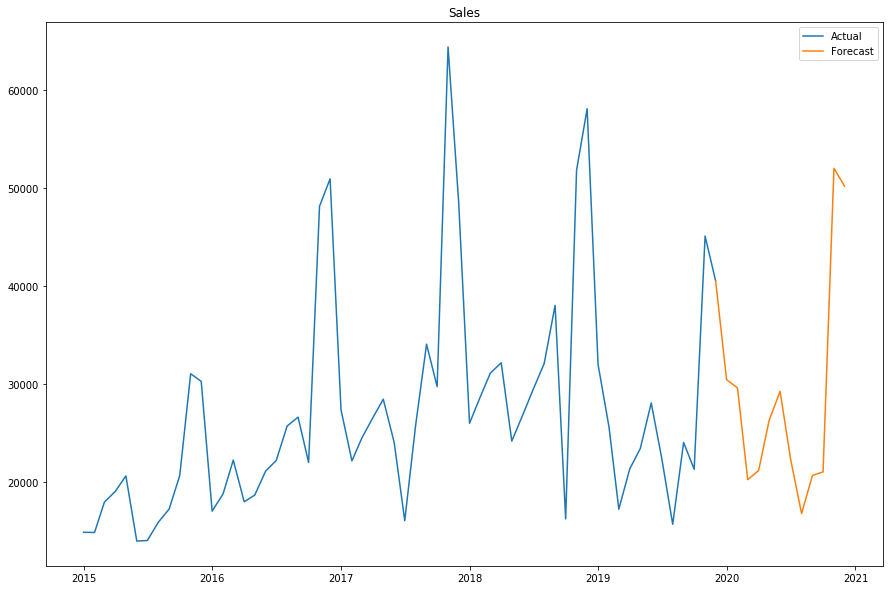

In [61]:
plt.plot(df['Sales'][:60], label="Actual")
plt.plot(df['Sales'][59:], label="Forecast")
plt.title("Sales")
plt.legend()
plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

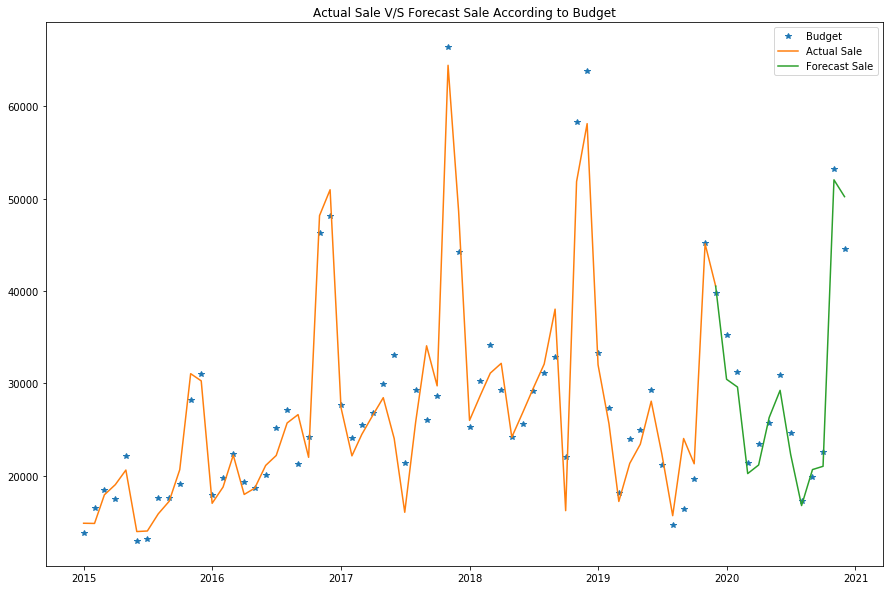

In [62]:
plt.plot(df['Budget'], '*', label="Budget")
plt.plot(df['Sales'][:60], label="Actual Sale")
plt.plot(df['Sales'][59:], label="Forecast Sale")
plt.title("Actual Sale V/S Forecast Sale According to Budget")
plt.legend()
plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

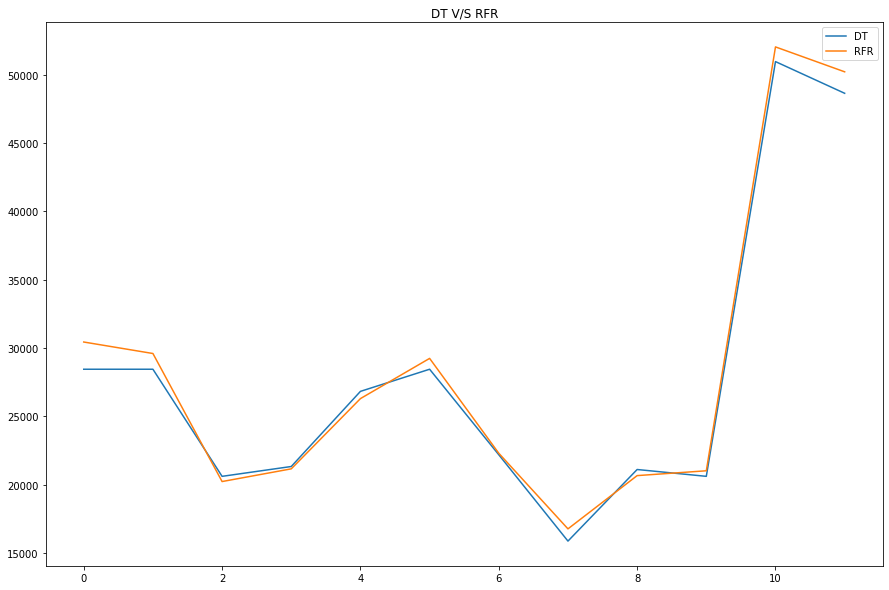

In [63]:
plt.plot(y_pred, label="DT")
plt.plot(y_pred_1, label="RFR")
plt.title("DT V/S RFR")
plt.rcParams["figure.figsize"] = (30,10)
plt.legend()
plt.show()